In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip install mlxtend pandas

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
data = pd.read_csv('~/Groceries_dataset.csv')

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [7]:
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

basket = basket.map(lambda x: 1 if x > 0 else 0)

basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.015393,(Instant food products)
1,0.078502,(UHT-milk)
2,0.031042,(baking powder)
3,0.119548,(beef)
4,0.079785,(berries)


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
3,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
4,(bottled water),(UHT-milk),0.213699,0.078502,0.021293,0.099640,1.269268,0.004517,1.023477,0.269801
5,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217
6,(brown bread),(UHT-milk),0.135967,0.078502,0.012314,0.090566,1.153681,0.001640,1.013266,0.154172
7,(UHT-milk),(brown bread),0.078502,0.135967,0.012314,0.156863,1.153681,0.001640,1.024783,0.144557
8,(butter),(UHT-milk),0.126475,0.078502,0.010518,0.083164,1.059394,0.000590,1.005085,0.064181
9,(UHT-milk),(butter),0.078502,0.126475,0.010518,0.133987,1.059394,0.000590,1.008674,0.060840


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


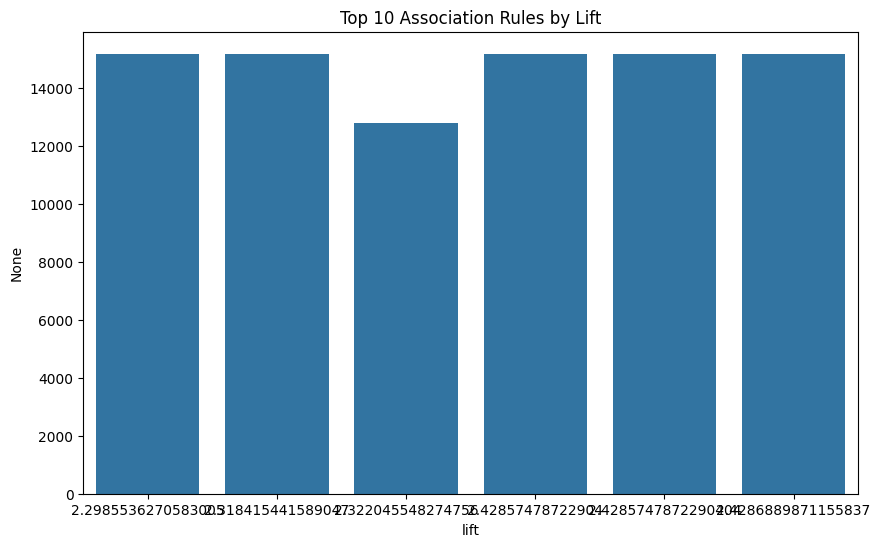

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

top_rules = rules.sort_values('lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.show()
